# Exploring NFL Play-By-Play Data

### Ian Johnson, Derek Phanekham, Travis Siems

## Introduction

The NFL (National Football League) has 32 teams split into two conferences, the AFC and NFC. Each of the 32 teams plays 16 games during the regular season (non-playoff season) every year. Due to the considerable viewership of American football, as well as the pervasiveness of fantasy football, considerable data about the game is collected. During the 2015-2016 season, information about every play from each game that occurred was logged. All of that data was consolidated into a single data set which is analyzed throughout this report.

## Business Understanding

### Motivations and Intended Analyses

The data being used for analysis is a table of 63 attributes for 46,129 rows (plays). The data will be analyzed to identify two potential insights. The first goal, motivated by the prevalence of fantasy football, is to identify players who perform exceptionally well, and specifically to identify in what situations a player excels. The second goal, motivated by the need for coaching insights, is to produce situationally-aware metrics for the potential success of a play. For example: given a field location, score differential, team, and time, identify what type of play is most likely to be successful. 

#### Player Performance Insights

Two forms of player performance analysis are relevant for fantasy football and general player performance evaluation. The first is a novel analysis, wherein all players of a certain position are ranked based on their performance at that position. This analysis can provide insight into identifying which players are most valuable for a fantasy team. The second is player-to-player comparison. Fantasy players are often faced with a decision of which player to play on their fantasy team in any given week. They must choose between players based on their individual player performances, as well as their matchups for the week. Consider a situation where player A is individually superior to player B, but player B is facing a team whose defense is very weak, while player A is facing a team whose defense is strong. Which player is expected to outperform the other? This question can be answered by analyzing the performance of each individual player against their respective opponents.

#### Play-Calling Optimization

Offensive play-calling is a very difficult task, and is often a cause of error for teams and coaches. Providing a data-informed situational understanding of the probable outcomes of certain types of plays could help inform coaches' play-calling. Analyzing the statistical outcomes of play-calls can be done on  a league-wide, per-team, or per-matchup basis. As the analysis becomes more specific (narrowing down to a specific team, or a specific matchup of two teams), the relevance of the analysis increases, but so does the margin of error.

### Data Purpose and Performance Metrics

The vast amount of money, pride, and time involved in NFL football is profound. It is for that reason that the play-by-play data was gathered in the first place. The intent of analyzing the data is to identify trends or statistics which can meaningfully influence the decisions made by coaches and It is important to define a metric by which the results of any analyses will be measured. Since two main forms of analysis will occur, two performance metrics must be defined.

#### Metrics for Player Performance Insights

Any meaningful player performance analysis must include a novel look at season-long player performance. For a running back, for example, total carries, yards, and touchdowns must be calculated. However, this novel analysis is simply a baseline. In order for a player performance analysis to be considered effective or meaningful, specific trends must be identified for that player which do not appear during routine stat summaries. For example, for a running back, a meaningful and effective analysis may conclude that the player in question performs significantly better when playing against teams whose defenses are very strong against passing plays, or that he performs significantly better when playing away, as opposed to at home.

#### Metrics for Play-Calling Optimization

In order to effectively inform offensive play-calling, play-call analysis must discover trends which identify, for a given game scenario, play calls which have statistically significantly higher probable yardage outcomes than other play calls. For example, given a scenario where an offense is down by 14 points in the 3rd quarter, on their own 35 yard line, an effective play-call analysis would be one that identified that a run play would produce statistically significantly more yardage than a passing play.

Play-calling optimization could also be effective in a generalized scenario. For example, an effective analysis may reveal that offenses have the most success with running up the middle of the offensive line when near the goal line, but have more success with runs to the outside when nearer to the middle of the field. 

## Data Understanding

### Data Attributes

The following are descriptions of the data attributes from the play-by-play data which will be considered in the analysis of the dataset.

* **GameID** (*nominal*): A unique integer which identifies each game played 
* **Drive** (*ordinal*): The number of the drive during a game when the play occurred (indexed at one, so the first drive of the game has Drive 1 and the nth drive has Drive n)
* **qtr** (*interval*): The quarter of the game when the play occurred
* **down** (*interval*): The down when the play occurred (1st, 2nd, 3rd, or 4th)
* **TimeSecs** (*interval*): The remaining game time, in seconds, when the play began
* **PlayTimeDiff**: The amount of time that passed between the beginning of the previous play and the beginning of the current play, in seconds
* **SideofField** (*nominal*): What side of the field the play started on (the 2-or-3 character code for the team whose defensive end zone is nearest to the ball at the start of the play)
* **yrdln** (*ratio*): The yard-line on the field where the play started (from 0-50)
* **yrdline100** (*ratio*): The absolute yard-line on the field where the play started (from 0 to 100, where 0 is the defensive end zone and 100 is the offensive end zone of the team with the ball)
* **ydstogo** (*ratio*): The number of yards from the line of scrimmage to the first-down line
* **ydsnet** (*ratio*): The number of yards from the beginning of the drive to the current line of scrimmage
* **GoalToGo** (*nominal*): A binary attribute whose value is 1 if there is no first down line (the end-zone is the first down line) or 0 if there is a normal first down line
* **FirstDown** (*nominal*): A binary attribute whose value is 1 if a first down was gained on the play, or 0 if no first down occurred
* **posteam** (*nominal*): A 2-or-3 character code representing the team on offense
* **DefensiveTeam** (*nominal*): A 2-or-3 character code representing the team on defense
* **desc** (*nominal*): A plain-English text description of the play
* **Yards.Gained** (*ratio*): The number of yards gained on the play
* **sp** (*nominal*): A binary attribute whose value is 1 if the play was a scoring play, or 0 if the play was not a scoring play
* **Touchdown** (*nominal*): A binary attribute whose value is 1 if a touchdown was scored on the play, or 0 if a touchdown was not scored on the play
* **ExPointResult** (*nominal*): A binary attribute whose value is 1 if an extra point was scored on the play, or 0 if an extra point was not scored on the play
* **TwoPointConv**: (*nominal*) An attribute whose value is NULL if the play was not an attempt at a two point conversion, 'Success' if the play was a successful two point conversion, and 'Failure' if the play was an unsuccessful two point conversion
* **DefTwoPoint**: (*nominal*) A binary attribute whose value is NULL if no attempt at a defensive two-point conversion was made, 1 if a defensive two-point conversion was successful, or a 0 if a defensive two-point conversion failed.
* **Safety**: (*nominal*) A binary attribute who value is 1 if the play resulted in a safety, or 0 if not.
* **PlayType**: (*nominal*) An attribute that identifies the type of play (i.e. Kickoff, Run, Pass, Sack, etc)
* **Passer**: (*nominal*) An attribute that lists the name of the Passer if a pass took place during that play, if there was not a pass during the play, this value is NULL (This does not mean that 'PlayType' must have a value of 'Pass')
* **PassOutcome**: (*nominal*) A binary attribute that denotes whether a pass was successful or not. Its value is 'Complete' if the pass was completed, and 'Incomplete' if the pass was incomplete. If there was not a pass during that play, this value is NULL.
* **PassLength**: (*nominal*) A binary attribute that denotes the length of the pass. If it was a short pass, the value of the attribute is 'Short', if it was a long pass (any pass longer than 15 yards), its value is 'Deep'. If there was not a pass during that play, this value is NULL.
* **PassLocation**: (*nominal*) An attribute that tells where on the field a pass took place. It has three unique values, 'left', 'right', and 'middle'. If there was not a pass during that play, this value is NULL.
* **InterceptionThrown**: (*nominal*) A binary attribute that denotes whether or not the play resulted in an interception. It is 1 if an interception was thrown and 0 otherwise. As one would expect, relatively few plays result in an interception, about 1%.
* **Interceptor**:(*nominal*) The name of the person who made the interception. If an interception was not thrown during this play, the value of this attribute is NULL.
* **Rusher**: (*nominal*) The name of rusher if a run took place during that play, if there was not a run during the play, this value is NULL. This is the name of a runner who has possession of the ball, not  someone who tried to rush the quarterback.
* **RunLocation**: (*nominal*) An attribute that tells where on the field a run took place. It has three unique values, 'left', 'right', and 'middle'. If there was not a run during that play, this value is NULL.
* **RunGap**: (*nominal*) The type of player who made a gap in the offensive line through which a rusher ran, or NULL if no run play occurred.
* **Receiver**: (*nominal*) An attribute that lists the name of Receiver if a pass took place during that play, if there was not a pass during the play, this value is NULL.
* **Reception**: (*nominal*) A binary attribute that denotes whether the receiver caught the ball. If they caught the ball successfully, this attribute has a value of 1, if not it has a value of 0.
* **ReturnResult**: (*nominal*) Describes the outcome of a return (for a kickoff, punt, etc.). There are three possible values for this, which are 'Touchback', 'Fair Catch', and 'Touchdown'. This value is NULL if no return took place in this play.
* **Returner**: (*nominal*) The name of Returner if a return took place during that play, if there was not a return during the play, this value is NULL.
* **Tackler1**: (*nominal*) The name of the tackler if a tackle took place during the play, if there was not a tackle during the play, this value is NULL.
* **Tackler2**: (*nominal*) The name of the tackler if a second tackle took place during the play, if there was not a second tackle during the play, this value is NULL.
* **FieldGoalResult**: (*nominal*) Describes the outcome of a field goal attempt. There are three possible values for this, which are 'No Good', 'Good', and 'Blocked'. This value is NULL if no field goal attempt took place in this play.
* **FieldGoalDistance**: (*ratio*) The number of yards a field goal attempt was made from.
* **Fumble**: (*nominal*) A binary attribute that denotes whether or not the a fumble was made on this play. If there was a fumble, this attribute has a value of 1, if not it has a value of 0.
* **RecFumbTeam**: (*nominal*) The name of the name of the team that fumbled the ball, if there was not a fumble during the play, this value is NULL
* **RecFumbPlayer**: (*nominal*) The name of the name of the player who fumbled the ball, if there was not a fumble during the play, this value is NULL
* **Sack**: (*nominal*) A binary attribute that denotes whether a sack made on this play. If there was a sack, this attribute has a value of 1, if not it has a value of 0.
* **Challenge.Replay**: (*nominal*) A binary attribute that denotes whether or not the result of a call on the play was challenged. If there was a challenge, this attribute has a value of 1, if not it has a value of 0.
* **ChalReplayResult**: (*nominal*) Describes the outcome of a challenge. There are two possible values for this, which are 'Reversed' and 'Upheld'. If the challenge is successful, the ruling is reverse, if it unsuccessful, the ruling is upheld. This value is NULL if no challenge took place in this play.
* **Accepted.Penalty**: (*nominal*) A binary attribute that whether or not there was a penalty on the play. If there was a if there was a penalty, this attribute has a value of 1, if not it has a value of 0.
* **PenalizedTeam**: (*nominal*) The name of the team that was penalized, if there was no penalty during the play, this value is NULL
* **PenaltyType**: (*nominal*) The type of penalty placed on the penalized team. There are many possible types of penalties. If there was not a penalty, this attribute is NULL
* **PenalizedPlayer**: (*nominal*) The name of the player who was penalized, if there was no penalty during the play, this value is NULL
* **Penalty.Yards**: (*ratio*) The number of penalized yards that the penalty resulted in, if there was no penalty, the value of this attribute is 0.
* **ScoreDiff**: (*ratio*) The difference in score between the offensive and defensive at the time of the play.
* **AbsScoreDiff**: (*ratio*) The absolute value of the difference in score between the offensive and defensive at the time of the play.

### Data Quality

#### Loading the Data

Before data quality can be assessed, the data must be loaded into memory and extraneous attributes must be removed.

In [2]:
#For final version of report, remove warnings for aesthetics.
import warnings
warnings.filterwarnings('ignore')

#Libraries used for data analysis
import pandas as pd
import numpy as np
from sklearn import preprocessing

df = pd.read_csv('data/data.csv') # read in the csv file

#List of attributes which aren't going to be used for analysis
columns_to_delete = ['Unnamed: 0', 'Date', 'time', 
                     'PosTeamScore', 'PassAttempt', 'RushAttempt', 
                     'DefTeamScore', 'Season', 'PlayAttempted']

#Iterate through and delete the columns we don't want
for col in columns_to_delete:
    if col in df:
        del df[col]

#### Missing Data
Missing data needs to be identified and either removed or imputed.

For many columns, there is intentionally missing data (for example, the "Interceptor" column is N/A when no interception was thrown).

In order to help identify missing data, the attributes will be labeled as continuous, ordinal, binary, or categorical, and each scale of data will be imputed on its own.

In [3]:
#Defining list of column names of each of the scales of variables being used.
#Interval and Ratio features are grouped together, and binary features are separated from other ordinal features
continuous_features = ['TimeSecs', 'PlayTimeDiff', 'yrdln', 'yrdline100',
                       'ydstogo', 'ydsnet', 'Yards.Gained', 'Penalty.Yards',
                       'ScoreDiff', 'AbsScoreDiff']
ordinal_features = ['Drive', 'qtr', 'down']
binary_features = ['GoalToGo', 'FirstDown','sp', 'Touchdown', 'Safety', 'Fumble']
categorical_features = df.columns.difference(continuous_features).difference(ordinal_features)

##### Missing Data for Categorical Features

First, the categorical features will be examined for missing data. Only three categorical columns have missing data: FieldGoalDistance, FirstDown, and GoalToGo. For each of these attributes, missing data represents plays where the attribute does not apply. FieldGoalDistance is set to NaN when no field goal occurs, and GoalToGo and FirstDown are set to NaN when the play is not an n-th down play (i.e. it's a kickoff or an extra point). Because these attributes are not meaningful for plays where they are set to NaN, it is acceptable to leave the missing data in those columns as NaN, as rows with NaN will be excluded from analysis related to those attributes. (For instance, to analyze field goal plays, it's completely reasonable to exclude all plays where no field goal attempt was made).

##### Missing Data for Ordinal Features

Next, the ordinal features will be examined for missing data. The only column with missing data in this scale is down. Down is set to NaN for plays which are not an n-th down plays, so no data imputation or deletion need occur.

##### Missing Data for Binary Features

Next, the binary features will be examined for missing data. The only columns with missing data in this scale are GoalToGo and FirstDown. Those two features are set to NaN for plays which are not n-th down plays, so no data imputation or deletion need occur.

##### Missing Data for Continuous Features

Finally, the continuous features will be examined for missing data. The continuous variables will be checked for missing data one-by-one, and imputation or deletion will occur on an attribute-by-attribute basis.

First, the dataset will be examined to see which columns include NaN values.

In [4]:
df[continuous_features].describe()

,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,Yards.Gained,Penalty.Yards,ScoreDiff,AbsScoreDiff
count,46102.000000,46075.000000,46021.000000,46021.000000,46129.000000,46129.000000,46129.000000,46129.000000,42878.000000,42878.000000
mean,1686.735847,20.214585,28.565090,49.411312,7.310152,26.672289,4.885538,0.652388,-1.061943,7.977797
std,1065.494471,17.613538,12.591719,24.852971,4.920808,25.379980,8.965909,2.716825,10.946834,7.570614
min,-747.000000,0.000000,1.000000,1.000000,0.000000,-48.000000,-34.000000,0.000000,-41.000000,0.000000
25%,NaN,NaN,NaN,NaN,3.000000,5.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,9.000000,20.000000,1.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,10.000000,45.000000,7.000000,0.000000,NaN,NaN
max,3600.000000,940.000000,50.000000,99.000000,42.000000,99.000000,99.000000,55.000000,41.000000,41.000000


There are many plays in the dataset which are placeholder rows which represent the end of a quarter, half, or game. Many of these plays have NA values for a number of continuous attributes. All of these plays will be removed from the dataset, as they don't represent actual plays that occurred on the field.

In [5]:
df = df[["end" != x[0:3].lower() for x in df.desc]]
df[continuous_features].describe()

,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,Yards.Gained,Penalty.Yards,ScoreDiff,AbsScoreDiff
count,45216.000000,45216.000000,45147.000000,45147.000000,45216.000000,45216.000000,45216.000000,45216.000000,42878.000000,42878.000000
mean,1693.513270,20.218109,28.564179,49.813963,7.457758,26.861996,4.984187,0.665561,-1.061943,7.977797
std,1065.233577,17.680825,12.594009,24.861196,4.858237,25.397215,9.028790,2.742519,10.946834,7.570614
min,-747.000000,0.000000,1.000000,1.000000,0.000000,-48.000000,-34.000000,0.000000,-41.000000,0.000000
25%,759.000000,5.000000,NaN,NaN,3.000000,5.000000,0.000000,0.000000,NaN,NaN
50%,1800.000000,16.000000,NaN,NaN,10.000000,20.000000,1.000000,0.000000,NaN,NaN
75%,2578.000000,37.000000,NaN,NaN,10.000000,45.000000,7.000000,0.000000,NaN,NaN
max,3600.000000,940.000000,50.000000,99.000000,42.000000,99.000000,99.000000,55.000000,41.000000,41.000000


Removing the "End of *something*" plays eliminates all NaN values for TimeSecs and PlayTimeDiff

The remaining continuous attributes with NaN columns will be evaluated one-by-one and imputation or deletion will occur on an attribute-by-attribute basis. 

The remaining missing attributes are all caused by TimeOut plays or Two-Minute-Warning plays. Because these rows are not actual plays, they can be deleted from the dataset.

In [6]:
# Remove rows representing Timeouts and Two-Minute-Warnings
df = df[[play not in ["Timeout", "Two Minute Warning"] for play in df.PlayType]]

Removing the timeouts and two-minute-warnings removes all remaining NaN values from the continuous feature set.

In [7]:
df[continuous_features].describe()

,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,Yards.Gained,Penalty.Yards,ScoreDiff,AbsScoreDiff
count,42876.000000,42876.000000,42876.000000,42876.000000,42876.000000,42876.000000,42876.000000,42876.000000,42876.000000,42876.000000
mean,1723.477866,20.444374,28.552500,50.925856,7.864563,26.733487,5.256017,0.701885,-1.061993,7.977283
std,1061.813073,17.788039,12.571522,24.843347,4.657417,25.429886,9.194528,2.811835,10.946318,7.570416
min,-747.000000,0.000000,1.000000,1.000000,0.000000,-48.000000,-34.000000,0.000000,-41.000000,0.000000
25%,807.000000,5.000000,20.000000,33.000000,5.000000,5.000000,0.000000,0.000000,-7.000000,3.000000
50%,1800.000000,18.000000,30.000000,53.000000,10.000000,20.000000,2.000000,0.000000,0.000000,7.000000
75%,2622.000000,37.000000,38.000000,73.000000,10.000000,45.000000,8.000000,0.000000,5.000000,12.000000
max,3600.000000,940.000000,50.000000,99.000000,42.000000,99.000000,99.000000,55.000000,41.000000,41.000000


Now that NaN values have been removed, columns can be coerced to the correct encoding for their data type. However, because NaNs exist in the data, some columns can not be coerced into numeric representations. In order to allow for coercion to numeric representations, NaN values will be replaced with -1. The value -1 will only exist in categorical and ordinal features, so it will not skew the data in the continuous columns. 

In [8]:
#Replace NaNs in categorical and ordinal columns with -1
df = df.replace(to_replace=np.nan,value=-1)

#Coercing the data columns to the correct types
df[continuous_features] = df[continuous_features].astype(np.float64)
df[ordinal_features] = df[ordinal_features].astype(np.int64)
df[binary_features] = df[binary_features].astype(np.int8)

#### Dataset After Missing Data Removal

After deleting missing data (rows for end of play and timeouts/two-minute warnings), 42867 of the 46128 original play rows remain in the data set. (About 93% of the data). The 7% of rows that were eliminated were not relevant to the analyses in this report, so the loss of those rows is acceptable. 

In addition, the removal and re-encoding of data reduced the dataset's size in memory from 22.5MB to 16.3MB, a decrease in memory expense of over 25%.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42876 entries, 0 to 46128
Data columns (total 55 columns):
GameID                42876 non-null int64
Drive                 42876 non-null int64
qtr                   42876 non-null int64
down                  42876 non-null int64
TimeUnder             42876 non-null float64
TimeSecs              42876 non-null float64
PlayTimeDiff          42876 non-null float64
SideofField           42876 non-null object
yrdln                 42876 non-null float64
yrdline100            42876 non-null float64
ydstogo               42876 non-null float64
ydsnet                42876 non-null float64
GoalToGo              42876 non-null int8
FirstDown             42876 non-null int8
posteam               42876 non-null object
DefensiveTeam         42876 non-null object
desc                  42876 non-null object
Yards.Gained          42876 non-null float64
sp                    42876 non-null int8
Touchdown             42876 non-null int8
ExPointResult  

## Data Visualization

For the following visualizations, the libraries **matplotlib**, **seaborn**, and **plotly** will be utilized.

In [10]:
#Setup seaborn
import seaborn as sns
sns.set_palette('muted')

In [11]:
#Setup plotly
import plotly
plotly.offline.init_notebook_mode() # run at the start of every notebook

In [12]:
#Setup matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

#Embed figures in the Jupyter Notebook
%matplotlib inline

#Use GGPlot style for matplotlib
plt.style.use('ggplot')

### Individual Statistics Visualizations

The first step in visualizing play data is examining some of the individual attributes of plays in isolation. A number of single-attribute visualizations will be used to gather some cursory information about the data, including identifying some of the top players in the NFL.

#### Distribution of Play Types

The first important statistic to visualize it the distribution of different play types that can occur. The most important play types to identify are Pass and Run. These are the two most frequent types of plays, and the relative frequencies of the two is important when deciding how to organize a defense.

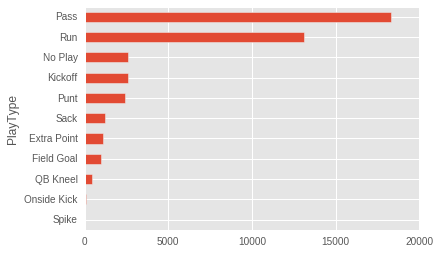

In [13]:
#Group data by playtype and plot the counts of the groups
df.groupby("PlayType").PlayType.count().sort_values().plot(kind='barh')

A quick look at the play type distribution shows that pass plays are generally more common than run plays. Many of the less-frequent play types are not critical in designing a defense. For example, the frequency with which a QB kneel occurs is not particularly important, as a QB kneel is not a play that warrants any real defensive strategy. 

While the relative difference in frequencies of run and pass plays are easily identified, it's difficult to visualize the ratio of onside kicks to standard kickoffs. However, the percentage of kickoffs which are onside kicks can be easily computed.

In [14]:
#Computing percentage of kickoffs which are on-side kicks
normal_kicks = len(df[df.PlayType == "Kickoff"])
onside_kicks = len(df[df.PlayType == "Onside Kick"])

print(str(onside_kicks / (normal_kicks + onside_kicks))[0:6] + "% of kicks are onside-kick attempts")

0.0254% of kicks are onside-kick attempts


With such a small percentage of onside kicks, a deeper look into when an onside kick will occur is necessary. Onside kicks will be examined in more detail in the upcoming sections.

#### Typical Yardage of a Play

A boxplot of Yards.Gained and ydstogo will help visualize a typical play in terms of yardage earned and yardage necessary to earn a first down.

Mean Yards.Gained per play: 5.256017352364959
Mean ydstogo per play: 7.864562925646049
Median Yards.Gained per play: 2.0
Median ydstogo per play: 10.0


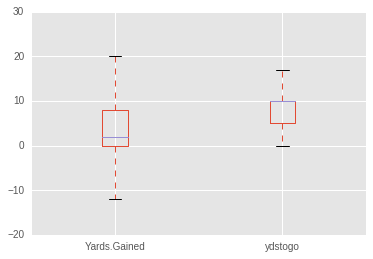

In [15]:
print("Mean Yards.Gained per play: " + str(df['Yards.Gained'].mean()))
print("Mean ydstogo per play: " + str(df['ydstogo'].mean()))

print("Median Yards.Gained per play: " + str(df['Yards.Gained'].median()))
print("Median ydstogo per play: " + str(df['ydstogo'].median()))

#Boxplot of Yards.Gained and ydstogo
df[["Yards.Gained", "ydstogo"]].plot(kind='box', ylim=[-20, 30])

This boxplot shows that Yards.Gained is a slightly right-skewed attribute. The mean is more than 3 yards higher than the median. ydstogo, on the other hand, is left skewed. The median is 10 yards, while the mean is less than 8 yards. This is likely the result of the first-down mechanic of football.


Since Yards.Gained is essentially the most important feature of a play with respect to the offense's goal of earning a touchdown, a more in-depth visualization of the attribute is warranted. A better look into the distribution of Yards.Gained can be achieved with a histogram:

0    0.0
dtype: float64


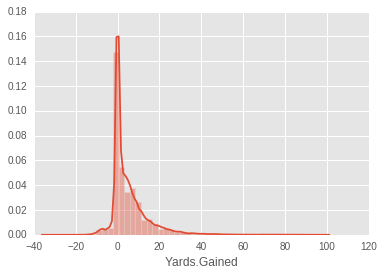

In [16]:
from plotly.offline import iplot_mpl

print(df["Yards.Gained"].mode())

#Plot the distribution of yards gained
sns.distplot(df["Yards.Gained"])

The histogram of yardage gain shows that there is a strong peak at around zero yards. Additionally, the mode of yards gained is 0. However, the data is quite right-skewed. While mostly unimodal, the distribution has a significantly larger number of instances of plays with new positive yardage than net negative. This is expected.

#### Identifying High-Performance Rushers

Identifying top players is an important problem for coaches and fantasy team managers alike. There are a number of metrics by which top players can be identified. For rushers, these metrics are yards per carry, total yards, and total rushing touchdowns.

##### Distribution of Rushers by Yards-Per-Carry

The top running backs and running players can be identified by finding the average yardage per carry of each running back over the course of the season.

In [17]:
#Select only rushing plays
rush_plays = df[(df.Rusher != -1)]

#Select groups of running plays by Rusher, but only for Rushers with more than 10 carries
rush_plays_grouped = rush_plays.groupby(by=['Rusher']).filter(lambda g: len(g) > 10).groupby(by=["Rusher"])

[]

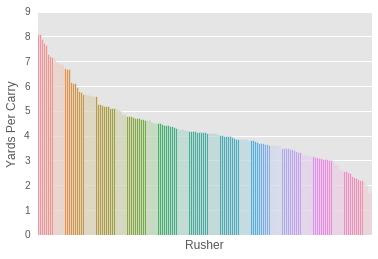

In [18]:
#Calculate the yards_per_carry for each rusher and sort them
yards_per_carry = rush_plays_grouped["Yards.Gained"].sum() / rush_plays_grouped["Yards.Gained"].count()
yards_per_carry.sort_values(inplace=True, ascending=False)

#Coerce the list back into a data frame for plotting
yards_per_carry_df = pd.DataFrame({'yards_per_carry': yards_per_carry, 'rusher' : yards_per_carry.index})

#Plot the distribution of yards-per-carry
ax = sns.barplot(x="rusher", y="yards_per_carry", data=yards_per_carry_df)
ax.set(xlabel='Rusher', ylabel='Yards Per Carry')
ax.set_xticks([])

##### The Top-10 Rushers by Yards-Per-Carry

The above barplot shows the mean yards per carry for every rusher with more than 10 carries in the 2015 NFL season. There is clearly a top-tier of rushers, who have the most yards-per-carry. Those are players who are likely valuable assets, so they should be identified.

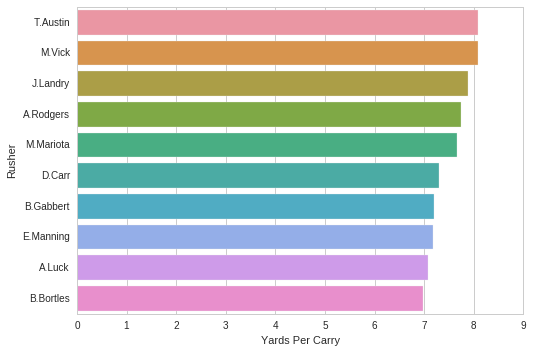

In [51]:
#Plot the yards-per-carry for only the top 10 rushers by yards-per-carry
ax = sns.barplot(x="yards_per_carry", y="rusher", data=yards_per_carry_df[:10])
ax.set(xlabel='Yards Per Carry', ylabel='Rusher')

Interestingly, it looks like the top rushers are mostly QBs. They are in many ways outliers. The fact that they earn many yards per carry is largely because they run very infrequently, and when they do, defensive ends are too far down the field to tackle them. 

##### Distribution of Rushers by Total Rushing Yardage

To isolate RBs, total running yardage can be assessed, and yards per carry can be assessed only for players who rarely throw the ball, to exclude QBs.

In [20]:
#Calculate total running yards for each player, sort them, and coerce them into a data frame for plotting
total_running_yards = rush_plays_grouped["Yards.Gained"].sum()
total_running_yards.sort_values(inplace=True, ascending=False)
total_running_yards_df = pd.DataFrame({'total_yards': total_running_yards, 'rusher' : total_running_yards.index})

Once the total running yards of each rusher have been calculated, they can be visualized. First, a histogram will show the distribution of rushers based on total yards gained over the course of the season.

[]

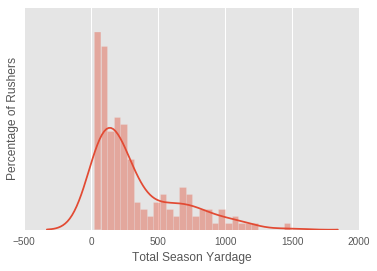

In [21]:
#Plot the distribution of total rushing yards per rusher in the NFL
ax = sns.distplot(total_running_yards_df['total_yards'], bins = 30)
ax.set(xlabel='Total Season Yardage', ylabel='Percentage of Rushers')
ax.set_yticks([])

This histogram shows that the majority of rushers only earn 100-200 yards in a season. This makes it even more important to isolate the elite rushers, because very few earn more than 1000 yards in a season.

To isolate top rushers, all rushers will be plotted based on their total yardage for the season.

[]

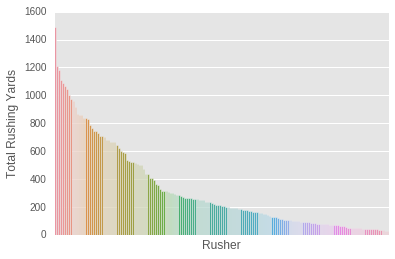

In [22]:
# Plot each individual rusher and their total rushing yards, sorted by total yards
ax = sns.barplot(x="rusher", y="total_yards", data=total_running_yards_df)
ax.set(xlabel='Rusher', ylabel='Total Rushing Yards')
ax.set_xticks([])

The above figure shows that the range of total yards earned by a rusher is much larger than the range of yards per carry. This is due to the fact that some rushers have many more carries than others.

##### Top Rushers by Total Rushing Yardage

A subset of these rushers can be isolated to identify the rushers with the most yards per season. These will be considered top-tier RBs.

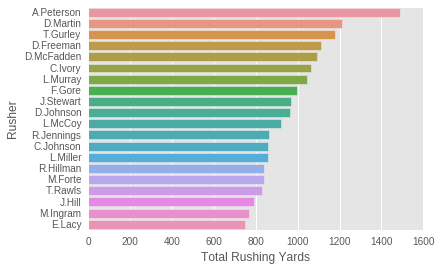

In [23]:
#Make barplot of rushers by total season rushing yards
ax = sns.barplot(x="total_yards", y="rusher", data=total_running_yards_df[:20])
ax.set(xlabel='Total Rushing Yards', ylabel='Rusher')

##### Top Rushers by Total Touchdowns

This reveals the top 20 RBs based on total yardage. This is an important insight when it comes to fantasy football, where the best running backs are those which earn the most total yards in a season. The same analysis can be done to find the RBs with the most running touchdowns.

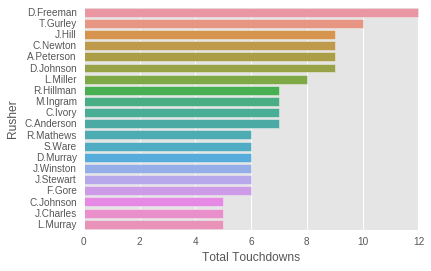

In [24]:
#Isolate touchdown rushing plays
touchdown_rush_plays = rush_plays[rush_plays.Touchdown == 1]

#Select groups of running plays by Rusher, but only for Rushers with more than 2 TDs
rush_plays_grouped = touchdown_rush_plays.groupby(by=['Rusher']).filter(lambda g: len(g) > 2).groupby(by=["Rusher"])

#Count TDs for each rusher
total_tds = rush_plays_grouped.size()

#Convert to DF for Seaborn
total_tds.sort_values(inplace=True, ascending=False)
total_tds_df = pd.DataFrame({'touchdowns': total_tds, 'rusher' : total_tds.index})

#Plot touchdowns by RB
ax = sns.barplot(x="touchdowns", y="rusher", data=total_tds_df[:20])
ax.set(xlabel='Total Touchdowns', ylabel='Rusher')

The above chart shows the number of *rushing* touchdowns earned by each rusher over the course of the season. This is an additional metric by which rushers can be ranked relative to one another.

#### Penalties

It may be of interest to identify which teams most frequently commit penalties, and which commit penalties the least. This can be achieved with a simple bar plot.

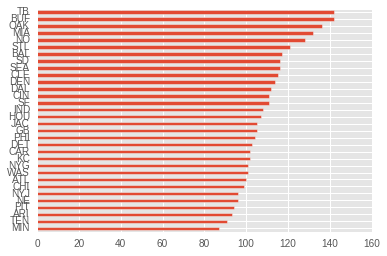

In [25]:
#Take only plays where penalties occurred
penalties = df[df['Penalty.Yards'] != 0]

#Plot the number of penalties per team
penalties['PenalizedTeam'].value_counts().sort_values().plot(kind='barh', stacked=True, fontsize=10)

The above bar plot shows how many penalties each team committed over the course of the season. This information can help teams identify if they need to make an active effort to reduce their penalization, or perhaps even to become more aggressive.

##### Distribution of Penalty Yardage

The distribution of penalty yardage is also of interest. A violin plot will be used to visualize the distribution of yards associated with penalties.

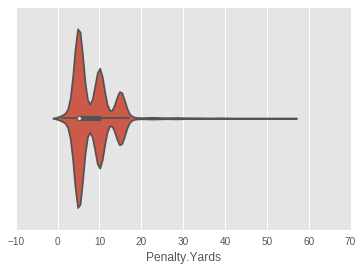

In [26]:
#Violin plot of penalty yardage
sns.violinplot(penalties["Penalty.Yards"])

The above violin plot indicates that penalty distance is tri-modal. This is likely caused by the fact that many penalties in football have a pre-prescribed yardage associated with them. However, this plot also identifies which of those sets of penalties is most common. For example, it shows that 5-yard penalties are nearly twice as common as 10-yard penalties.

There are a number of additional interesting things to visualize when it comes to single-attributes. However, in the interest of brevity, this report will now move on to multi-variate visualizations, the meat of the analysis.

### Multiple Statistics Visualizations

To take a first look at comparing some of the attributes, a scatter matrix will be used to see if there are any correlations or patterns among a handful of the continuous attributes in the dataset.

#### Scatter Matrix of Continuous Attributes

Yards.Gained, ydstogo, TimeSecs, and ScoreDiff will be compared to eachother in a scatter matrix.
This set of attributes is selected because it stands to reason that there may be correlations or patterns among these data columns. For example, it may be that when ScoreDiff is a large negative number (when the offensive team is behind), Yards.Gained is higher, because the offense is running low-percentage high-gain passing players.

The scatter matrix is color-coated by playtype (run or pass) to see if there is any pattern between those two play types with respect to the attributes being plotted. A sample of 250 plays will be plotted, to make the plots simpler to read.

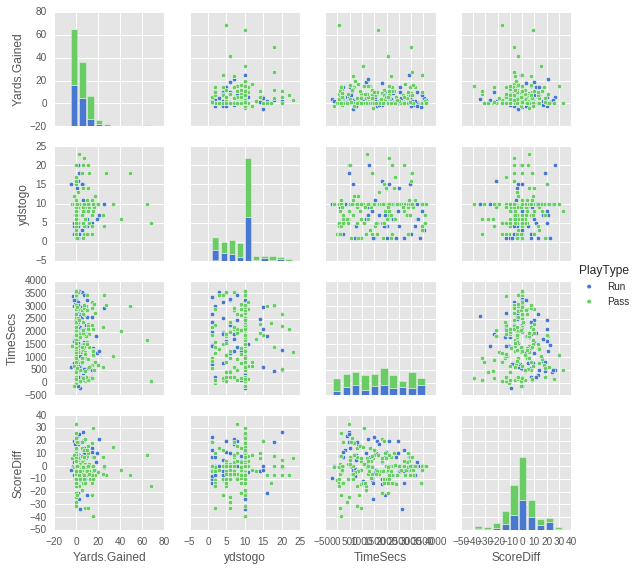

In [27]:
#Isolate variables for 
df_plot = df[["Yards.Gained", "ydstogo", "TimeSecs", "PlayType", "ScoreDiff"]]
df_plot = df_plot[[x in ["Run", "Pass"] for x in df_plot.PlayType]].sample(250)

#Plot a scatter matrix of the 4 continuous attributes, color-coded by PlayType
sns.set_palette("muted")
sns.pairplot(df_plot, size=2, hue="PlayType")

From this simple scatter matrix, no strong correlations are evident. Some basic patterns emerge, such as the fact that high-yardage plays seem to be overwhelmingly pass plays, and plays where ydstogo is very high typically are pass plays, while plays where ydstogo is very low are typically run plays.

The histograms on the diagonal also contain some interesting information. For example, ScoreDiff follows a zero-centered normal distribution. This is expected, due to the nature of the ScoreDiff attribute. As expected,TimeSecs follows a reasonably uniform distribution. The Yards.Gained attribute, however, does not follow a normal distribution. It follows a uni-modal left-skewed distribution. The vast majority of plays result in a -5 to 5 yard gain. The Yards.Gained histogram also confirms the fact that run plays generally generate fewer yards than passing plays.

The fact that no strong correlations seem to emerge among the 4 plotted attributes indicates that no one of these attributes is a good predictor of the others. The benefit to this is that, because the attributes are so weakly correlated, they truly represent multiple dimensions in the data, and are not simply data redundancy. 

#### Play-Type Split by Play

Before diving into the details of play type distributions and per-team play performance, a novel look has to be taken into the distribution of play types over the 4 different downs that can occur. This can be done with a simple stacked bar plot.

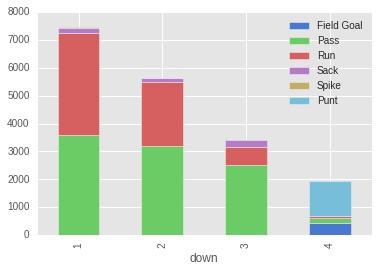

In [28]:
#Isolate releant attributes
df_playtype = df[['qtr', 'down', 'TimeSecs', 'PlayType']]
df_playtype = df[df.down != -1]

#Group and then re-flatten
dfp_sample = df_playtype[['down', 'PlayType']].sample(20000)
dfp_sample_reset = dfp_sample.groupby(['down', 'PlayType']).size().reset_index()

#Data transformation to get it to a plot-able form
playtypes = ['Field Goal', 'Pass', 'Run', 'Sack', 'Spike', 'Punt']
dfp_list = [dfp_sample_reset[dfp_sample_reset.PlayType == x] for x in playtypes]
for i, x in enumerate(dfp_list):
    dfp_list[i] = dfp_list[i][['down',0]]
    dfp_list[i].columns = ['down', playtypes[i]]

#Concatenate the list into one data frame and then plot it
pd.concat([x.set_index('down') for x in dfp_list], axis=1).plot(kind='bar', stacked=True)

This stacked barplot shows the number of instances of each type of play being called for every down that can occur. Interestingly, it seems that run plays become less and less common as down increases. For 1st down plays, run plays are the most likely, but for 3rd down plays, pass plays represent a large majority of plays. On 4th down, on the other hand, punts and field goals dominate (as expected), but a close look shoes that pass plays outnumber run plays on 4th down, which is also a valuable insight.

#### Play-Type Split Per Team

It's likely that some teams are more likely to run than others, and that other teams are more likely to throw. This could be the result of having a star QB or a star RB. To identify teams which focus more on passing or running, all teams will be plotted on a stacked barplot where the y-axis is the percentage of plays that are runs or passes, sorted by run percentage.

Minimum Run Percentage: 0.350769230769
Maximum Run Percentage: 0.514583333333


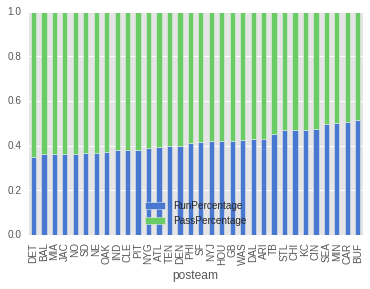

In [29]:
#Isolate running and passing plays, and group by team and play types
team_analysis = df[['posteam', 'PlayType', 'Yards.Gained']]
team_analysis = team_analysis[team_analysis.posteam != -1]
team_analysis = team_analysis[(team_analysis.PlayType == 'Run') | (team_analysis.PlayType == 'Pass')]
team_grouped = team_analysis.groupby(['posteam', 'PlayType'], sort=True)

#get the count of each playtype per team and coerce back into un-grouped dataframe
teams_count = team_grouped.count()
teams_count.columns = ['count']
teams_count = teams_count.reset_index()

#gets the total number of plays for each team (Run + Pass)
def teamSum(x):
    return teams_count[teams_count.posteam == x.posteam]['count'].sum()

#add to teams_count as column 'totals'
totals = teams_count.apply(teamSum, axis=1)
teams_count['totals'] = totals

#finds percentage of PlayTypes for each team
def teamPercent(x):
    return x['count'] / x['totals']

#adds percentages to teams_count
teams_count['percentages'] = teams_count.apply(teamPercent, axis=1)
teams_count_perc = teams_count[['posteam', 'PlayType', 'percentages']]

#this is to format the data to make plotting easier
trp = teams_count_perc[teams_count_perc.PlayType == 'Run']
tpp = teams_count_perc[teams_count_perc.PlayType == 'Pass']
trp = trp.set_index('posteam')
tpp = tpp.set_index('posteam')
pass_run = pd.concat([trp, tpp], axis=1)

#plot playtype percentage per team
pass_run.columns = ['PlayType1', 'RunPercentage', 'PlayType2', 'PassPercentage']
pass_run = pass_run.sort_values(by = 'RunPercentage')
pass_run[['RunPercentage', 'PassPercentage']].plot(kind = 'bar', stacked=True)

print("Minimum Run Percentage: " + str(pass_run['RunPercentage'].min()))
print("Maximum Run Percentage: " + str(pass_run['RunPercentage'].max()))

While there is some variation in the distribution of play type among teams, there is not a very wide range of percentages. All teams fall between 35% and 51% run plays. However, this could be valuable in predicting the PlayType for a certain play.

##### Play Performance by Type per Team

Since all teams seem to follow a similar distribution of run plays vs pass plays, it's worth seeing if some teams are more successful than others in terms of run and pass plays. This can be assessed with a barplot made of average running yards and average passing yards per play for every team in the league.

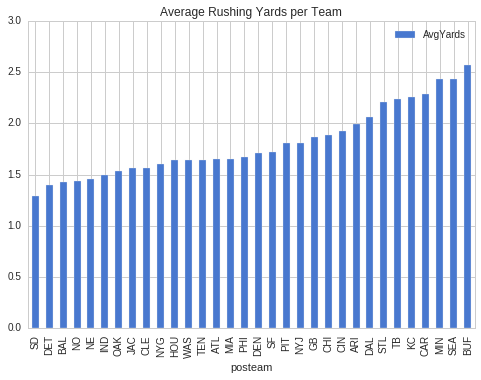

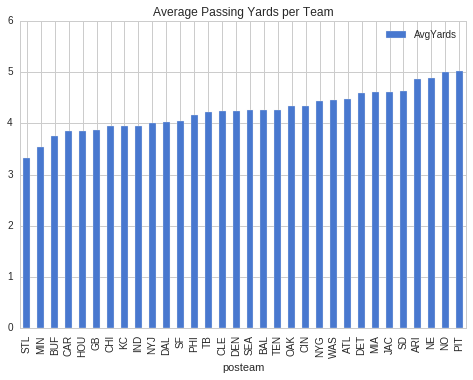

In [56]:
#Take group sum and coerce back to data frame
team_yards = team_grouped.sum().reset_index()
team_yards['totals'] = totals

#Get average yardage for each team
def teamAvgYards(x):
    temp =  x['Yards.Gained'] / x['totals']
    return temp

#Compute average yardage
team_yards['AvgYards'] = team_yards.apply(teamAvgYards, axis=1)
team_yards = team_yards[['posteam', 'PlayType', 'AvgYards']]

#Split into two data frames for runs and passes
tyr = team_yards[team_yards.PlayType == 'Run']
typ = team_yards[team_yards.PlayType == 'Pass']

#Sort each list in place
tyr =tyr.set_index('posteam').sort_values(by = 'AvgYards')
typ =typ.set_index('posteam').sort_values(by = 'AvgYards')

#Make the bar plots
tyr.plot(kind='bar', title = "Average Rushing Yards per Team")
typ.plot(kind='bar', title = "Average Passing Yards per Team")

This pair of bar plots shows that there is significant variation in the average yardage of passing and running plays for each team in the NFL. Interestingly, the amount of variation in average yardage per team is very similar for pass plays and run plays. Average running yardage varies from 1.3 to 2.6, while average passing yardage varies from 3.3 to 5.1. There is slightly more variation in running plays by percentage, but it's not dramatically more than it is for passing.

Interestingly, the top teams by average rushing yards appear to be, generally speaking, some of the worst teams in terms of average passing yards, and vise-versa. 

##### Correlation Between Average Passing Yardage and Average Rushing Yardage by Team

To further analyze the observed trend that the best teams in terms of passing yards per pass play are the worst teams in terms of rushing yards per rush play, a simple scatter plot with a line of best fit is used.

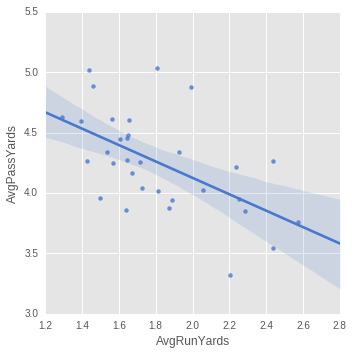

In [31]:
#Concatenate the passing and running plays for plotting
team_avg_yards = pd.concat([tyr, typ], axis=1)
team_avg_yards.columns = ['a', 'AvgRunYards', 'b', 'AvgPassYards']

#Scatter plot with regression line and confidence bounds.
sns.lmplot(x = "AvgRunYards", y = "AvgPassYards", data = team_avg_yards)

There appears to be a somewhat strong negative trend between average rushing yards per carry and average passing  yards per throw for NFL teams. This trend is not strong enough to predict average rushing yards meaningfully based on average passing yards, or vise-versa, but it does provide some insight into coaching strategies, offensive play-calling, and fantasy football. It identifies a general trend that high-octane passing teams are less likely to produce top-performing RBs, and powerful rushing teams aren't likely to yield large gains in the air.

#### Field Goal Data

To take a simple look at some field goal data, the FieldGoalResult attribute is compared to the FieldGoalDistance attribute. A violin plot of the data helps visualize the probability of success, failure, and blockage of a field goal.

                 FieldGoalDistance  PlayType
FieldGoalResult                             
Blocked                  42.739130       NaN
Good                     36.642686       NaN
No Good                  47.000000       NaN


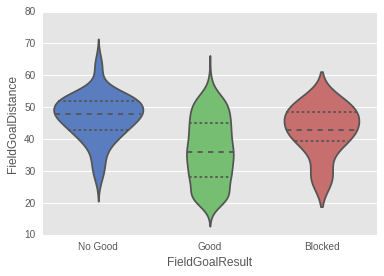

In [32]:
fg_analysis = df[['FieldGoalDistance','FieldGoalResult', 'PlayType']]

#Remove plays that aren't kicks
fg_analysis = fg_analysis[fg_analysis['FieldGoalDistance'] > -1.0]

#Group by result
fg_grouped = fg_analysis.groupby(by=["FieldGoalResult"])
print(fg_grouped.sum()/fg_grouped.count())

#Plot the distributions of yardage for each field goal result
sns.violinplot(x="FieldGoalResult", y="FieldGoalDistance", data=fg_analysis, inner="quart")

The violin plot of field goal results indicates a number of things. The first meaningful insight is that the distribution of successful field goal attempts is nearly uniform between 20 and 50 yards. Missed field goals, on the other hand, follow a very unimodal distribution, with the majority of missed attempts occurring at around 50 yards. Blocked field goals also follow a unimodal distribution. However, the distribution of blocked field goals is much less normal than that of missed field goals.

##### Isolating Non-Blocked Kicks

To directly compare missed kicks to successful kicks, the blocked kicks can be excluded.

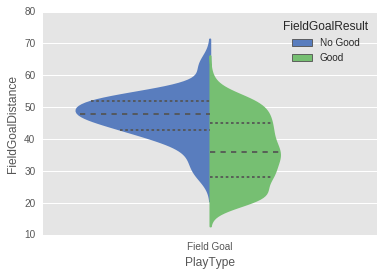

In [33]:
#Remove blocked kicks
fg_analysis = fg_analysis[fg_analysis['FieldGoalResult'] != "Blocked"]
fg_analysis = fg_analysis[fg_analysis['PlayType'] == "Field Goal"]

#Plot scored and missed field goals, side-by-side
sns.violinplot(x = "PlayType", y="FieldGoalDistance",  hue="FieldGoalResult", data=fg_analysis, inner="quart", split = True)

The above graph, which is essentially a simplification of the previous graph, shows side-by-side the distributions of his and missed field goals. It helps identify the relative chances of success and failure for different kick distances.

#### Pass Performance by Location

To identify trends in pass performance, the pass plays can be split up into the pass location. The dataset separates passes into 'right', 'left', and 'middle.' A violin plot of the three locations will be used to visualize the distributions of the pass plays that occurred in those locations.

              Yards.Gained
PassLocation              
left              7.106336
middle            8.668673
right             6.777901


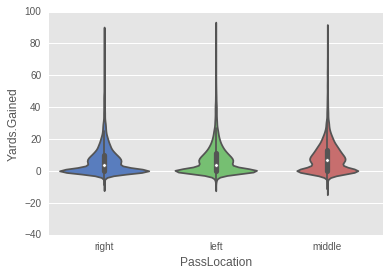

In [34]:
#Isolate pass plays
df_plot = df[df.PlayType == "Pass"]

#Remove incomplete passes
df_plot = df_plot[df_plot.PassLocation != -1]

#Group by pass locations
groups_by_pass_location = df_plot[['Yards.Gained', 'PassLocation']].groupby("PassLocation")
distances_by_pass_location = groups_by_pass_location.sum() / groups_by_pass_location.count()
print(distances_by_pass_location)

#Violin plot
sns.violinplot(x="PassLocation", y = "Yards.Gained", data = df_plot)

The above violin plot indicates that left and right passes, as expected, have very similar yardage distributions. Middle passes, on the other hand, are more bimodal, and are more likely to go for more than 20 yards than passes to the left or right. However, generally speaking, there doesn't appear to be a significant difference in pass performance based on pass location.

#### Run Performance by Location

The run plays, much like the pass plays, are broken up by location into 'left', 'right', and 'middle.' By splitting the dataset up into these three types of runs, the relative outcomes of the different types of runs can be assessed.

             Yards.Gained
RunLocation              
left             4.493709
middle           4.084351
right            4.425228


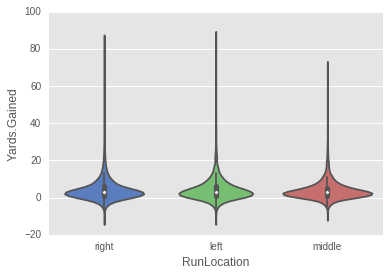

In [35]:
#Isolate pass plays
df_plot = df[df.PlayType == "Run"]

#Ignore plays with missing run location data
df_plot = df_plot[df_plot.RunLocation != -1]

#Group by run locations
groups_by_run_location = df_plot[['Yards.Gained', 'RunLocation']].groupby("RunLocation")
distances_by_run_location = groups_by_run_location.sum() / groups_by_run_location.count()
print(distances_by_run_location)

#Violin plot
sns.violinplot(x="RunLocation", y = "Yards.Gained", data = df_plot)

This distributions of right and left run plays are, as expected, quite similar. The middle run plays, however, follow a slightly narrower distribution. They appear to frequently result in very few yards, but also seem to rarely result in negative yardage. Additionally, the upper bound on yardage gain from outside runs appears to be larger than it is for middle runs. However, once again, there is no obvious difference in run performance based on run location.

##### Run Performance by Location and Block Type

Two runs in the same location may differ based on the blocking strategy. Blocking strategy refers to the type of offensive player who provides a block for the runner. These players can be tackles, guards, or ends. To compare the blocking abilities of the three types of players, a factor plot is used.

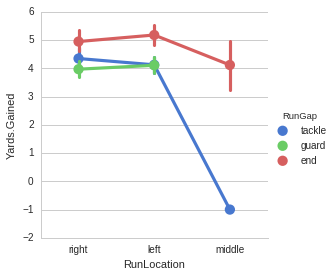

In [36]:
#Isolate run plays and their features
run_analysis = df[df.PlayType == 'Run']
run_analysis = run_analysis[['Yards.Gained','RunGap','RunLocation']]
run_analysis = run_analysis[run_analysis.RunGap != -1]

#Reformat data for prettification
run_analysis = run_analysis[run_analysis.RunLocation != -1]

#Set seaborn style
sns.set(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
sns.factorplot(x="RunLocation", y="Yards.Gained", hue="RunGap", data=run_analysis)

The above factor plot shows a number of things. First, run plays where an end player was the blocker are generally the most successful. They outperform the other blockers, even when error bounds are considered. Second, runs to the left seem to have a slightly higher average yardage than runs to the right, and outside runs generally have higher yardage outcomes than middle runs. The final interesting insight is that middle runs where tackles are the blocking players perform very poorly. This is likely because tackles are on the outside edge of the offensive line, so they are not in an ideal position blocking. Tackles, however, seem to perform best on the right-side runs. This is likely because the job of the left tackle is almost always to protect the QB, not to block for a runner.

#### Scoring Per Quarter

It may stand to reason that scoring happens more-or-less frequently in different quarters of the game. Moreover, it's possible that touchdowns happen more-or-less frequently than other scoring plays in different quarters. A stacked barplot is used to visualize any such trend.

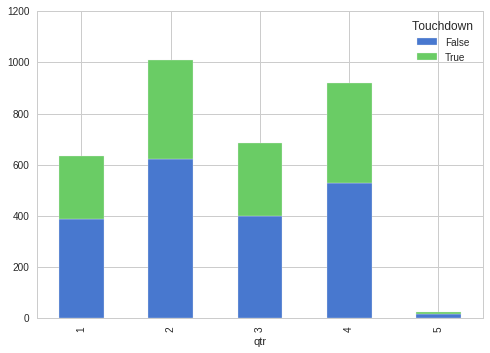

In [37]:
#Isolate scoring plays and relevant features
quarter_data = df[df['sp'] == 1]
quarter_data = quarter_data[['qtr','Touchdown','sp']]

#Group by quarter
qd_grouped = quarter_data.groupby(by=['qtr'])

#Crosstab data for plotting
qd_info = pd.crosstab([quarter_data['qtr'] ], 
                       quarter_data.Touchdown.astype(bool))

#Barplot of stacked scoring plays by quarter
qd_info.plot(kind='bar', stacked=True)

The above bar plot shows that, in general, scoring is more frequent in the 3rd and 4th quarters. This is likely due to the fact that a kickoff always occurs at the beginning of the 1st and 3rd quarters, where the 2nd and 4th quarters can start mid-drive. With respect to the frequency of touchdowns relative to other types of scoring plays, it seems there is a reasonably even distribution among the quarters.

#### Correlation Between TimeSecs and ScoreDiff

In general, it's reasonable to consider a possible trend between game time elapsed and score difference. To visualize the possibility of such a trend, a joint plot will be used. Because both attributes are continuous ratio attributes, a scatter plot and histogram combination is an ideal plot.

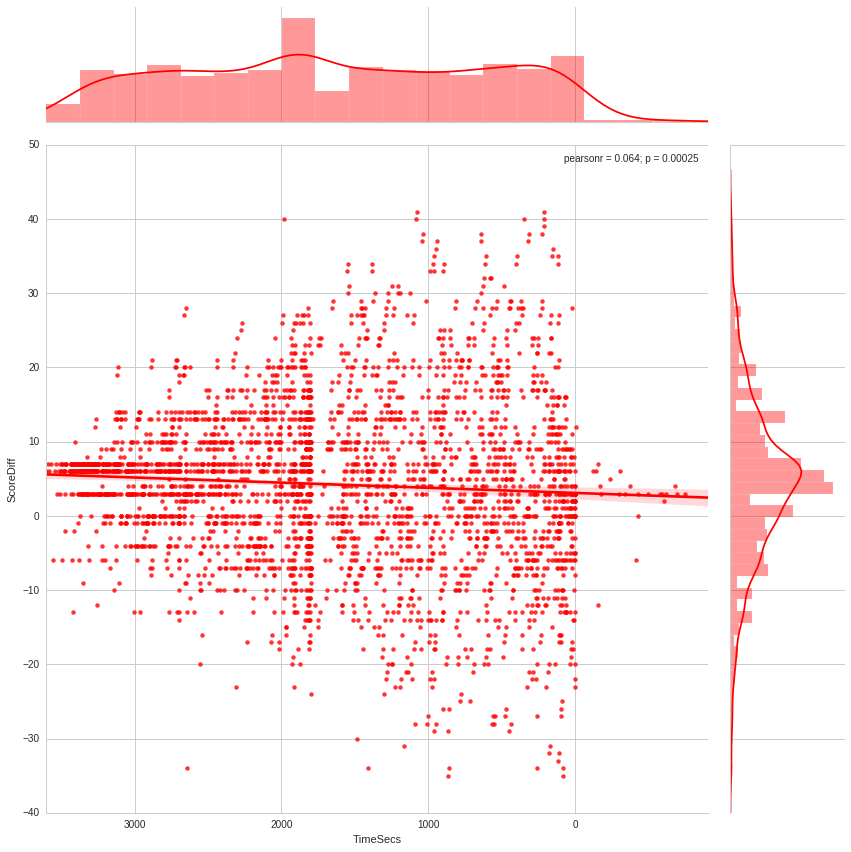

In [38]:
#Isolate scoring data and relevant attributes
time_score_data = df[df['sp'] == 1]
time_score_data = time_score_data[['sp','ScoreDiff','TimeSecs']]

#Joint plot of the two attributes
g = sns.jointplot("TimeSecs", "ScoreDiff", data=time_score_data, kind="reg",
                 xlim=(3600, -900), ylim=(-40, 50), color="r", size=12)

The joint plot of ScoreDiff and TimeSecs shows absolutely no meaningful trend between the two attributes. ScoreDiff appears to follow a very normal distribution, while TimeSecs (as expected) follows a continuous distribution. These two attributes appear to be almost completely uncorrelated.

##### Isolating Winning Teams

In the absence of a trend between game time and score difference, perhaps one exists when isolating teams that are winning at any given point of play. It stands to reason that, perhaps, as more time is elapsed, the team that is winning will earn a larger and larger lead. Once again, a joint plot will be used to visualize such a trend.

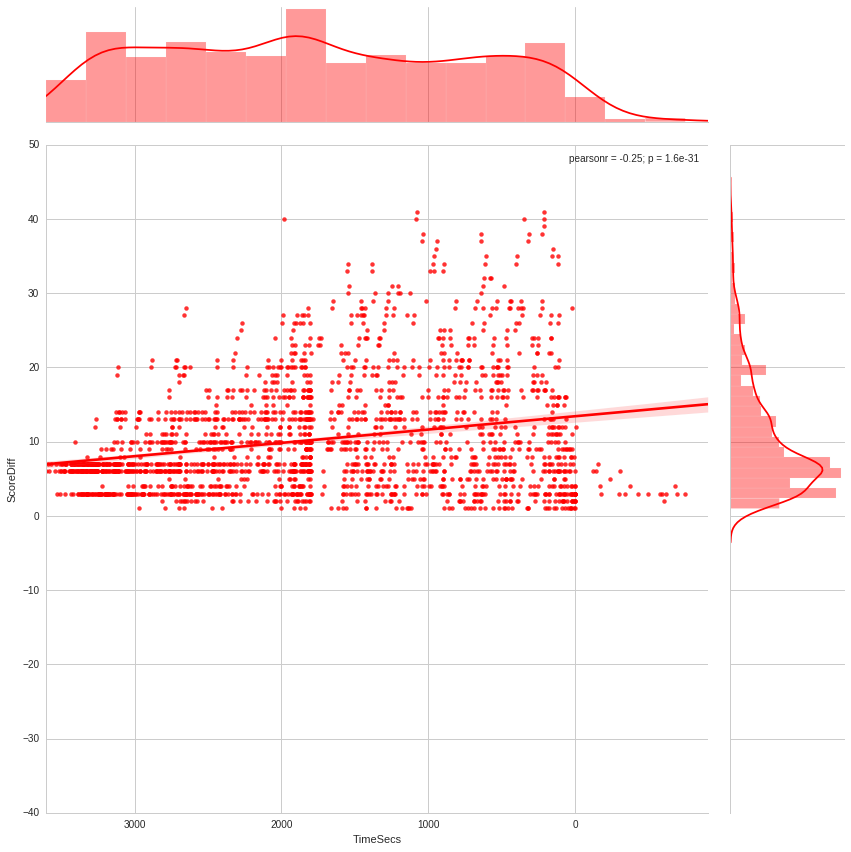

In [39]:
#isolate winning teams
time_score_data = time_score_data[time_score_data['ScoreDiff']>0]


#Joint plot of the two attributes
sns.jointplot("TimeSecs", "ScoreDiff", data=time_score_data, kind="reg",
                 xlim=(3600, -900), ylim=(-40, 50), color="r", size=12)

Once again, there is very little correlation between the two attributes. There appears to be a slightly stronger trend, as indicated by the larger correlation coefficient, but the attributes are still somewhat distinct. The new distribution of ScoreDiff looks somewhat like a right-skewed beta distribution, but in reality it is just the left half of the normal distribution from the previous plot.

#### Quarter vs TimeUnder

In different quarters, it's possible that the distribution of play frequency throughout the duration of the quarter is different. For example, one might expect that in the 4th quarter, the last few minutes have lots of plays, as a team may be trying to catch up from a late deficit. To visualize trends between quarter and plays-per-time over the quarter, a simple split-histogram is be used. The vertical axis represents the number of plays, in total, that occurred during a given minute of a quarter. The horizontal axis shows the quarter, and minute within that quarter.

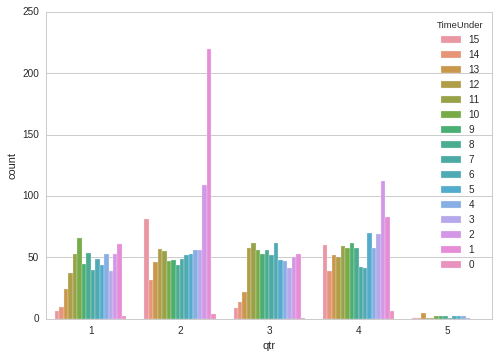

In [40]:
quarter_data = df[df['sp'] == 1]
quarter_data = quarter_data[['qtr','TimeUnder']]

sns.countplot(x="qtr",hue="TimeUnder",data=quarter_data, hue_order = range(15,-1,-1))

What the above set of histograms depicts is that, in general, in the 1st and 3rd quarters, very few plays occur in the first few minutes. In the 2nd and 4th quarters, lots of plays occur in the final few minutes of the quarter. Interestingly, this is especially true for the 2nd quarter, where a significant plurality of plays occur with less than a minute left of play.

### Classifying Plays Based on Play Type

Plays from the NFL dataset will be classified based on play type. In future reports, attempts will be made to build a model which can, given attributes about a play, identify if the play is a running play, a passing play, a punt, and so on. 

Before a classifier can be built, the PlayType attribute will be compared to existing attributes to see what attributes are strongly correlated with PlayType. Those attributes will be important components in a regression-based classifier.

#### Correlation of All Dataset Attributes

As a first attempt to identify factors strongly correlate with play types, a correlation plot will be used to show which attributes are highly correlated or inversely-correlated. Note that a number of the attributes are not continuous, which means that correlations are not always meaningful. However, all of the attributes are included to demonstrate the general lack of correlation among items in the dataset.

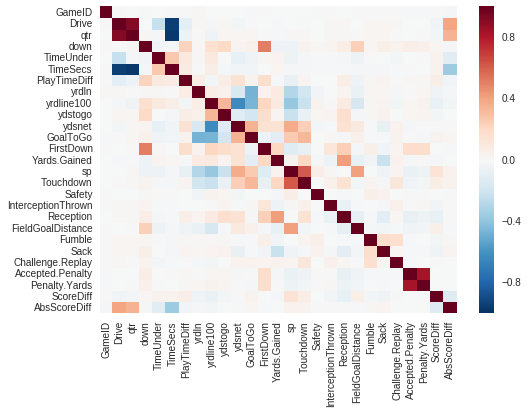

In [41]:
#Make a heatmap of the correlations among the data attributes
sns.heatmap(df.corr())

The first important insight from the above correlation plot is that, in general, there is little correlation among the various attributes in the dataset. This is represented by the paleness of the plot i general. White squares represent no correlation, and most of the pairs of attributes have correlations which aren't far from zero.

There are a number of attributes which appear to have strong correlations with one another. However, many of these are simply results of the nature of the sport and the nature of the attributes themselves. For example, ydsnet and ydline100 are highly correlated, because as a team advances down the field and their yardage gained increases, they also reach a higher yard line on the field.

#### Correlation of Select Continuous Attributes

To look at a few specific continuous attributes, a correlation plot of the continuous attributes graphed in a scatter matrix earlier in the report can be used:

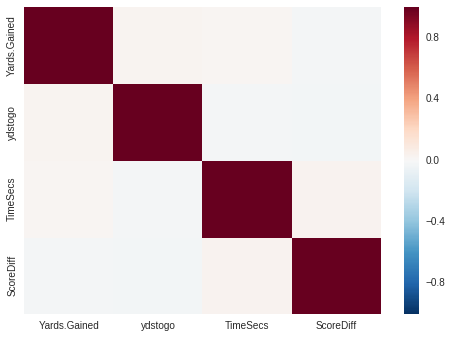

In [42]:
#Isolate a few attributes whose correlation will be mapped
df_plot = df[["Yards.Gained", "ydstogo", "TimeSecs", "ScoreDiff"]]

#Produce heatmap of the correlations among the attributes
sns.heatmap(df_plot.corr())

This correlation plot, like the above plot, shows very little correlation among the plotted datasets. This has an important ramification for classification: because these attributes are very un-correlated, principle component analysis will likely not do an excellent job of reducing the dimensionality of the dataset.

#### Correlation Between Yards.Gained and PlayType

To see if Yards.Gained is a good predictor of play type, a violin plot of the Yards.Gained attribute will be performed where the data is split up between rushing plays and passing plays. Note that Yards.Gained is only a meaningful predictor for two possible PlayTypes, rush and pass. Those are the only two that will be included in the violin.

Two violins will be drawn, one for scoring plays, one for non-scoring plays. This will help visualize if there is a difference in the Yards.Gained-PlayType correlation for scoring plays.

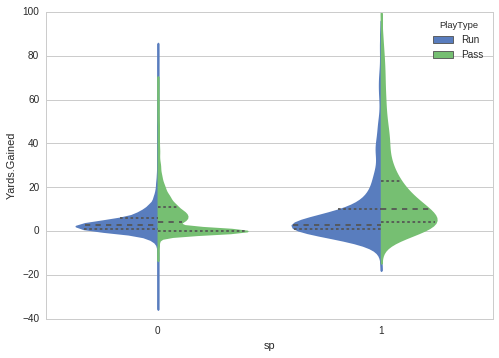

In [43]:
#Isolate run and pass plays
df_plot = df[[x in ['Run', 'Pass'] for x in df.PlayType]]

#Plot the yards gained distributions for the two types of plays
sns.violinplot(x = "sp", y = "Yards.Gained", data =df_plot, hue="PlayType", split=True, inner = 'quart')

What the above violin plot demonstrates is that there is very little correlation between Yards.Gained and PlayType. Because both violins are somewhat symmetrical, and the quartiles for each side of each violin are somewhat similar, it is difficult to discern strictly based on Yards.Gained and sp (scoringplay) if a play was a run or a pass.

#### Correlation Between ScoreDiff and PlayType

It stands to reason that there may be a correlation between score difference and play type, as teams who are behind by a lot of points may need to throw the ball frequently to try to catch up to their opponents. A scatter plot of PlayType vs ScoreDiff will help identify such a correlation, if one exists.

Mean ScoreDiff for run play: 0.7346969928255228
Mean ScoreDiff for pass play: -2.7617202423183977


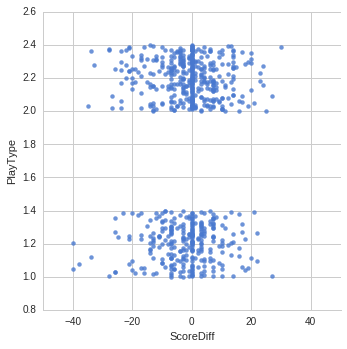

In [58]:
#Isolate run and pass plays
df_plot = df[[x in ['Run', 'Pass'] for x in df.PlayType]]

print("Mean ScoreDiff for run play: " + str(df_plot[df_plot.PlayType == 'Run'].ScoreDiff.mean()))
print("Mean ScoreDiff for pass play: " + str(df_plot[df_plot.PlayType == 'Pass'].ScoreDiff.mean()))

#PlayType converted to floating point value with jitter
playType_as_int = [1 if x == "Run" else 2 for x in df_plot.PlayType]

#Add jitter for visualization
playType_as_int = playType_as_int + np.random.rand(len(playType_as_int))/2.5
df_plot.PlayType = pd.Series(playType_as_int)

#Plot without a linear regression
sns.lmplot(x = "ScoreDiff", y = "PlayType", data = df_plot.sample(1000), fit_reg=False)

The above visualization shows no meaningful correlation between PlayType and ScoreDiff. The top group of plays are passing plays, while the bottom group of plays are running plays. The means, however, show that there is, on average, a difference between the score differences for the two types of plays. This suggests that running plays do, on average, occur more often when a team is in the lead.

The distributions of those ScoreDifferences can be visualized using a set of boxplots:

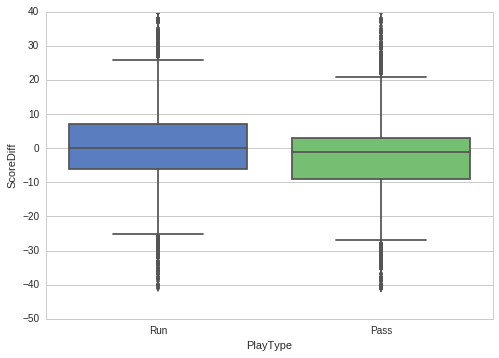

In [45]:
#Isolate run and pass plays
df_plot = df[[x in ['Run', 'Pass'] for x in df.PlayType]]

#Boxplot of the ScoreDiff when these types of plays occur
sns.boxplot(x = "PlayType", y = "ScoreDiff", data = df_plot)

The overlap in the 25-50th quantiles of the ScoreDiff for run and pass plays indicates that classification based solely on ScoreDiff would be very inaccurate. However, there is a slight difference in the distributions of ScoreDiff for each play type, which may be leveraged in the classification process in some way.

#### Correlation Between ydstogo, down, and PlayType

Since ScoreDiff is not a string predictor of PlayType, perhaps the combination of ydstogo and down are. For example, when offenses are met with a 3rd and long situation, they may be forced to go with a passing play, because a running play just won't get them the yards they need.

A violin plot of the ydstogo for a play for each possible down, split by PlayType, may help identify what types of plays are likely to be called given a specific down and yardage-to-go.

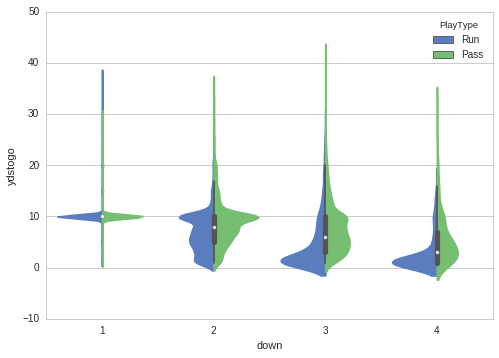

In [65]:
#Isolate run and pass plays
df_plot = df[[x in ['Run', 'Pass'] for x in df.PlayType]]
df_plot = df_plot[df_plot.down != -1]

#Violin plot, split by PlayType, with down on x axis and ydstogo on y axis
sns.violinplot(x = "down", y = "ydstogo", data = df_plot, fit_reg=False, hue = "PlayType", split=True)

What the above visualization indicates is that as down increases, the ability to predict PlayType becomes better. For first down situations, the distributions of run and pass plays are essentially even based on yardage. The distributions become less and less symmetric until 4th down, where running plays occur much less frequently for high-yardage situations.

Perhaps simply down is a good predictor of play type. To check, a bar plot of the percentage of plays on each down which are running plays.

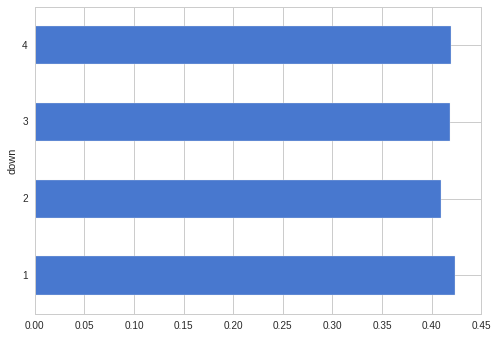

In [67]:
#Isolate run and pass plays
df_plot = df[[x in ['Run', 'Pass'] for x in df.PlayType]]
df_plot = df_plot[df_plot.down != -1]

#PlayType converted to integer
playType_as_int = [1 if x == "Run" else 0 for x in df_plot.PlayType]
df_plot.PlayType = pd.Series(playType_as_int)

#Group by down and count how often each type of play occurs
df_plot_groups = df_plot.groupby('down')
run_plays_by_down = df_plot_groups.PlayType.sum() / df_plot_groups.PlayType.count()

#Barplot the data
run_plays_by_down.plot(kind='barh')

The barplot of down vs percentage of running plays shows that there is no noticeable correlation between what down it is and what kind of play occurs. Therefore, down on its own is not a good predictor of PlayType. However, down and ydstogo may provide some insight into PlayType, as seen in the above violin plot.

### Additional Features

There are a few different features about each play that are missing, and that may provide additional insight to the analyses performed on the data set.

#### Length of Play
Each play includes information about the game time when the play began, but don't include information about how long the play took. This information could be added to the dataset by iterating through the rows of the dataset and, for each row, calculating the difference in time between the given row and the row before it. Adding this data column would require checking to make sure that the GameIDs, quarters, and posteams match for the two rows, so that time of play actually represented the time of a single play.

In [48]:
PlayTime = [-1 for x in range(len(df))]

for i in range(len(df)):
    try:
        if df.GameID[i] == df.GameID[i-1] and df.posteam[i] == df.posteam[i-1] and df.qtr[i-1] == df.qtr[i]:
            PlayTime[i] = df.TimeSecs[i-1] - df.TimeSecs[i]
    except:
        PlayTime[i] = -1
                         
PlayTime = pd.Series(PlayTime)
df['PlayTime'] = PlayTime

A violin plot of the data provides a novel affirmation that the data addition worked.

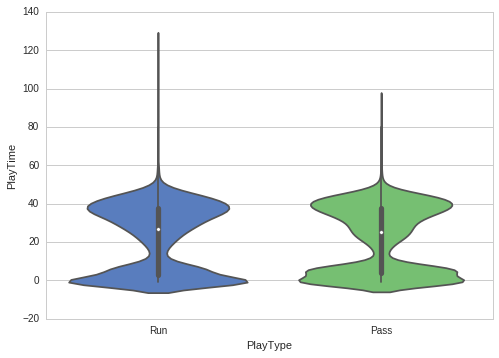

In [49]:
df_plot = df[[x in ['Run', 'Pass'] for x in df.PlayType]]
sns.violinplot(x = "PlayType", y = "PlayTime", data = df_plot)

It looks as if the addition of the data was successful, but before it can be used in analysis more verification would need to occur. Given, however, that 45 seconds are allowed between plays, this distribution makes sense. The bi-modality can be explained by the fact that sometimes the clock is stopped between plays, and sometimes it is not (this depends on the nature of the previous play).

#### Location of Game

The location where the game occurred would be valuable information in analyzing play data, as home-field advantage is a significant factor in professional football. This data could be collected from an external source and added into the dataset if it were deemed useful for further analysis.

##### Type of Stadium
For long-distance pass plays, as well as field goal attempts, punts, and kickoffs, the type of roof that a stadium has is very important. Open stadiums are exposed to wind, and that can cause difficulty for kickers and quarterbacks. Moreover, open stadiums expose players to natural weather like rain and snow, which can have a large impact on the outcome of many types of plays, as wet footballs are generally more difficult to throw, catch, and carry.

## Analyzing the Packers-Vikings Matchup

The long-standing Packers-Vikings NFC North rivalry is going to see the light of day this coming Sunday. To provide some insight into the upcoming game, a number of visualizations will be made about the two matchups that occurred between the two teams in the 2015-2016 season.

First, the data for the Green Bay - Minnesota matchup (GB vs MIN) will be isolated:

In [136]:
#Select plays in GB vs MIN games
GBvMIN = df[[x in ['GB', 'MIN' ] for x in df.posteam]]
GBvMIN = GBvMIN[[x in ['GB', 'MIN' ] for x in GBvMIN.DefensiveTeam]]

#Split the data into the two games
Game_1 = GBvMIN[GBvMIN.GameID == 2015112205]
Game_2 = GBvMIN[GBvMIN.GameID != 2015112205]

### Score Data Previous Matchups

The first important metric to analyze for the two games it the score over time for each team. The following plots shows a time series of the score of each team for the first two games. For both plots

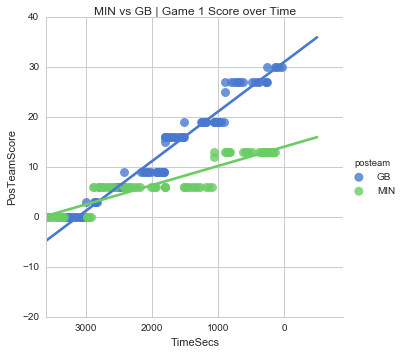

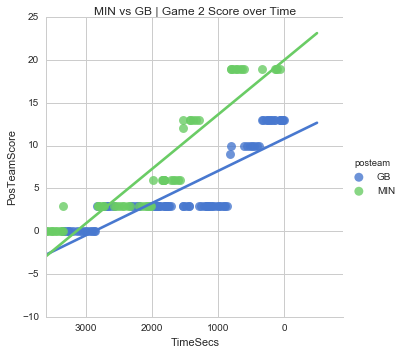

In [138]:
# plot the score over time for Game 1 GB vs MIN
ax = sns.lmplot(x="TimeSecs", y="PosTeamScore", data=Game_1, hue="posteam",
order=1, ci=None, scatter_kws={"s": 80});

# reverse the way time is displayed so the start of the game is on the right
ax.set(xlim=(3600,-900))

ax.fig.suptitle("MIN vs GB | Game 1 Score over Time")

# plot the score over time for Game 2 GB vs MIN
ax = sns.lmplot(x="TimeSecs", y="PosTeamScore", data=Game_2, hue="posteam",
order=1, ci=None, scatter_kws={"s": 80});

# reverse the way time is displayed so the start of the game is on the right
ax.set(xlim=(3600,-900))

ax.fig.suptitle("MIN vs GB | Game 2 Score over Time")

A first look at the time series data for the two games shows no serious advantage in favor of one team over the other in terms of the scorelines of their previous games. In the first matchup, the Packers won by a strong margin over the Vikings, but in the second matchup, the Vikings took the win with a one-touchdown lead.

Because there's no clear winner between the two based on overall score, an in-depth look will be taken at the rushing, passing, and defensive capabilities of the two teams.




### Packers vs Vikings Running

To take a look at which team performs best on the ground when the two match up, a bar plot of the rushers from each team and how they perform when they face head-to-head is used. The bars are color-coded by team.

Total Rushing Yards:
posteam
GB     207.0
MIN    245.0
Name: Yards.Gained, dtype: float64


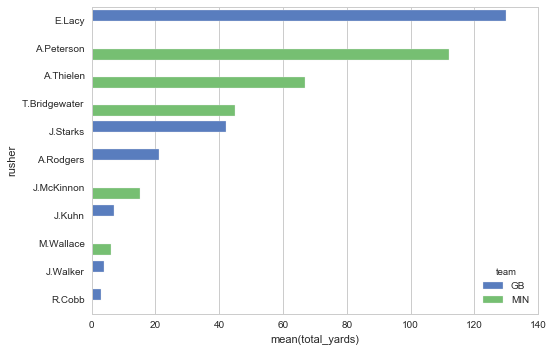

In [171]:
run_plays = GBvMIN[GBvMIN.PlayType == "Run"]
run_plays_grouped = run_plays.groupby('Rusher')

from statistics import mode

total_running_yards = run_plays_grouped["Yards.Gained"].sum()
total_running_yards.sort_values(inplace=True, ascending=False)
teams = [mode(run_plays[run_plays.Rusher == x].posteam.tolist()) for x in total_running_yards_df.rusher]
total_running_yards_df = pd.DataFrame({'total_yards': total_running_yards, 'rusher' : total_running_yards.index, 'team': teams})

ax = sns.barplot(y="rusher", x="total_yards", data=total_running_yards_df, hue = 'team')

print("Total Rushing Yards:\n" + str(run_plays.groupby('posteam')['Yards.Gained'].sum()))

From the looks of it, when the Packers meet the Vikings head-to-head, RB Eddie Lacy outperforms league star Adrian Peterson. However, the 2nd, 3rd, and 4th top rushers are Vikings, so the Vikings actually outperform the packers overall in terms of rushing yards. The Packers put up 207 yards in the two matchups, while the Vikings put up 245.

### Packers vs Vikings Passing

While the Vikings, with their star RB Adrian Peterson, seem to dominate the ground game, it's possible that the Packers' star QB Aaron Rodgers gives them an edge in the matchup. To visualize the 

### Packers vs Vikings Defense